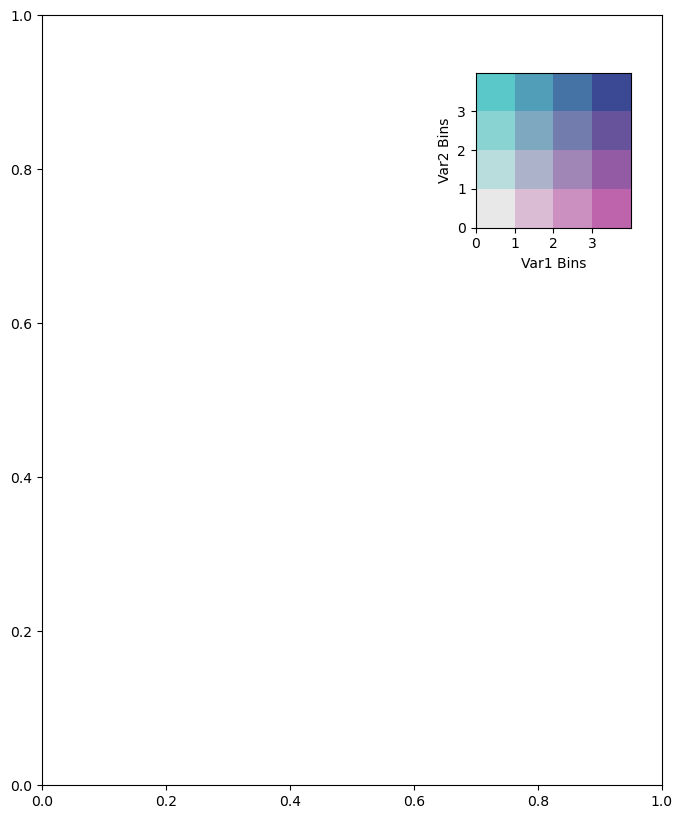

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from PIL import ImageColor


# Define fixed bin edges
num_bins = 4
bin_edges = np.linspace(-14, 14, num_bins + 1)

# Define corner colors
def hex_to_rgb_normalized(hexcode):
    """
    Convert a hex color code to an RGB tuple with normalized values (0 to 1).
    """
    rgb = ImageColor.getcolor(hexcode, 'RGB')  # Convert hex to RGB tuple
    return np.array(tuple(v / 255 for v in rgb))

def lerp(color1, color2, t):
    return color1 * (1 - t) + color2 * t

c00 = hex_to_rgb_normalized('#e8e8e8')
c10 = hex_to_rgb_normalized('#be64ac')
c01 = hex_to_rgb_normalized('#5ac8c8')
c11 = hex_to_rgb_normalized('#3b4994')



c00_to_c10 = [lerp(c00, c10, i / (num_bins - 1)) for i in range(num_bins)]
c01_to_c11 = [lerp(c01, c11, i / (num_bins - 1)) for i in range(num_bins)]
colorlist = [lerp(c00_to_c10[i], c01_to_c11[i], j / (num_bins - 1))
             for i in range(num_bins) for j in range(num_bins)]
 
### convert back to hex color


# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
# ces.plot(ax=ax, color=ces['color'], edgecolor='black', alpha=0.8)
# ax.set_title("Bivariate Colormap")
# ax.set_xticks([])
# ax.set_yticks([])

# Create inset legend
legend_ax = ax.inset_axes([0.7, 0.7, 0.25, 0.25])
legend_ax.set_aspect('equal', adjustable='box')
for i in range(num_bins):
    for j in range(num_bins):
        rect = Rectangle((i, j), 1, 1)
        legend_ax.add_patch(rect)
        legend_ax.patches[-1].set_facecolor(colorlist[i * num_bins + j])

legend_ax.set_xlim([0, num_bins])
legend_ax.set_ylim([0, num_bins])
legend_ax.set_xticks(range(num_bins))
legend_ax.set_yticks(range(num_bins))
legend_ax.set_xlabel("Var1 Bins")
legend_ax.set_ylabel("Var2 Bins")

plt.show()


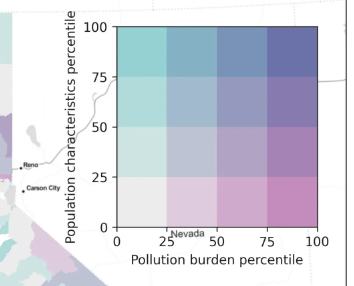

In [9]:
c00

(0.9098039215686274, 0.9098039215686274, 0.9098039215686274)

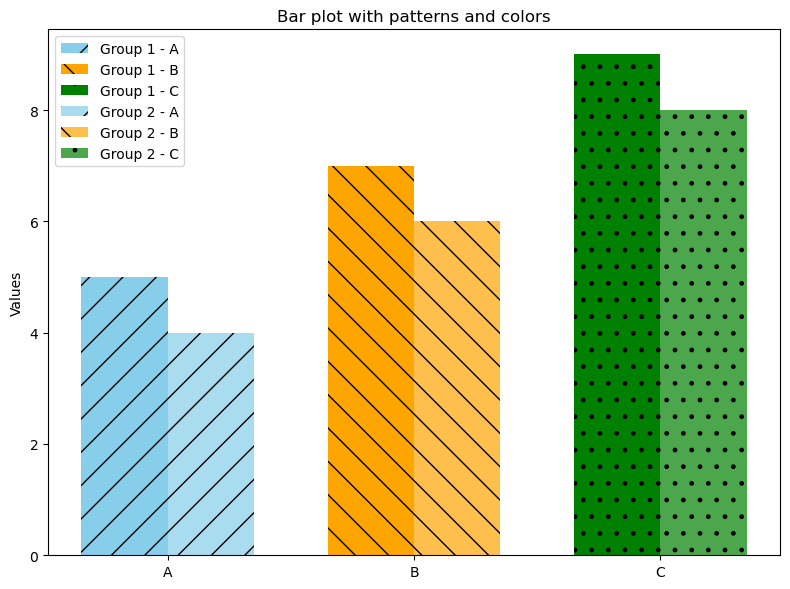

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['A', 'B', 'C']
values1 = [5, 7, 9]
values2 = [4, 6, 8]

# Define colors and patterns
colors = ['skyblue', 'orange', 'green']
hatches = ['/', '\\', '.']

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

# Bar 1 with color and pattern
for i in range(len(categories)):
    ax.bar(
        x[i] - width / 2, 
        values1[i], 
        color=colors[i], 
        hatch=hatches[i], 
        width=width, 
        label=f'Group 1 - {categories[i]}'
    )

# Bar 2 with color and pattern
for i in range(len(categories)):
    ax.bar(
        x[i] + width / 2, 
        values2[i], 
        color=colors[i], 
        hatch=hatches[i], 
        width=width, 
        label=f'Group 2 - {categories[i]}',
        alpha=0.7  # Adding transparency for clarity
    )

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_title("Bar plot with patterns and colors")
ax.set_ylabel("Values")
ax.legend()

plt.tight_layout()
plt.show()